# 당뇨병 수치 예측

## 라이브러리

In [163]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.datasets
import math

##  데이터 가져오기

In [7]:
diabetes = sklearn.datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

## 모델에 입력할 데이터 x,y 준비하기

In [8]:
df_X = diabetes.data
df_y = diabetes.target

In [21]:
print(type(df_X))
print(df_X.shape)
print(type(df_y))
print(df_y.shape)

<class 'numpy.ndarray'>
(442, 10)
<class 'numpy.ndarray'>
(442,)


## train, test 분리

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,test_size = 0.2,shuffle = True,random_state = 24)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## 모델 준비하기

In [89]:
W = np.random.rand(10)
b = np.random.rand()

In [22]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i] * W[i]
    predictions += b
    return predictions

## 손실함수 loss 정의

In [23]:
def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

In [26]:
def loss(X,W,b,y):
    predictions = model(X,W,b)
    L = MSE(predictions,y)
    return L

## Gradient 함수 구현

In [28]:
def gradient(X, W, b, y):
    N = len(W) 
    
    y_pred = model(X,W,b)
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

## 학습률 설정하기

In [90]:
LEARNING_RATE = 0.01

## 모델 학습하기

In [91]:
losses = []

for i in range(1,3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(df_X, W, b, df_y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 20864.5243
Iteration 20 : Loss 15447.8930
Iteration 30 : Loss 11800.2955
Iteration 40 : Loss 9334.6592
Iteration 50 : Loss 7659.4160
Iteration 60 : Loss 6513.3632
Iteration 70 : Loss 5722.2229
Iteration 80 : Loss 5169.6738
Iteration 90 : Loss 4778.0371
Iteration 100 : Loss 4495.3985
Iteration 110 : Loss 4287.0242
Iteration 120 : Loss 4129.6384
Iteration 130 : Loss 4007.6088
Iteration 140 : Loss 3910.4051
Iteration 150 : Loss 3830.9045
Iteration 160 : Loss 3764.2627
Iteration 170 : Loss 3707.1610
Iteration 180 : Loss 3657.3047
Iteration 190 : Loss 3613.0884
Iteration 200 : Loss 3573.3725
Iteration 210 : Loss 3537.3338
Iteration 220 : Loss 3504.3658
Iteration 230 : Loss 3474.0120
Iteration 240 : Loss 3445.9203
Iteration 250 : Loss 3419.8128
Iteration 260 : Loss 3395.4653
Iteration 270 : Loss 3372.6930
Iteration 280 : Loss 3351.3408
Iteration 290 : Loss 3331.2763
Iteration 300 : Loss 3312.3852
Iteration 310 : Loss 3294.5677
Iteration 320 : Loss 3277.7357
Iteration 330 

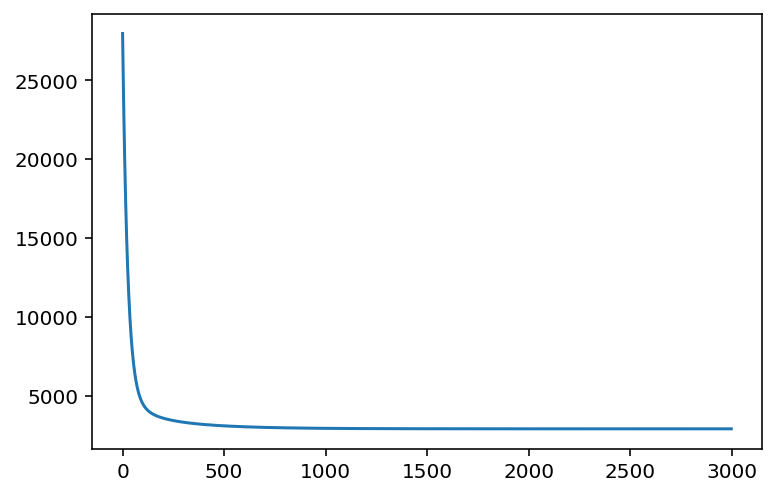

In [92]:
plt.plot(losses)
plt.show()

## Test 데이터에 대한 성능 확인

In [93]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3197.5234219363415

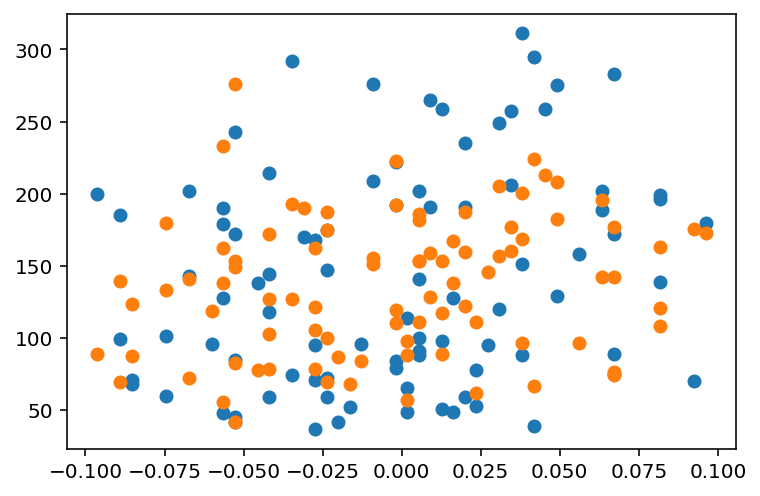

In [94]:
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## Conclusion
- loss가 생각보다 잘 줄어 들지 않음.
- scatter plot을 보니 딱히 선형관계가 있는 것처럼 보이지 않음.
- 예측을 위해 다른 모델을 쓰는 것이 좋을 것 같음.

# 월요일 오후 세 시 자전거 타는 사람 수

## 데이터 가져오기

In [241]:
bike = pd.read_csv('~/aiffel/bike_regression/data/bike-sharing-demand/train.csv')
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## datetime 컬럼 자료형 변환, 날짜/시간 6가지 컬럼 생성

In [242]:
bike.info()
bike.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


(10886, 12)

In [243]:
bike['datetime'] = pd.to_datetime(bike['datetime'])

In [244]:
bike['year'] = bike['datetime'].dt.year
bike['month'] = bike['datetime'].dt.month
bike['day'] = bike['datetime'].dt.day
bike['hour'] = bike['datetime'].dt.hour
bike['minute'] = bike['datetime'].dt.minute
bike['second'] = bike['datetime'].dt.second

In [245]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


## 날짜/시간 시각화 하기

/home/aiffel0036/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


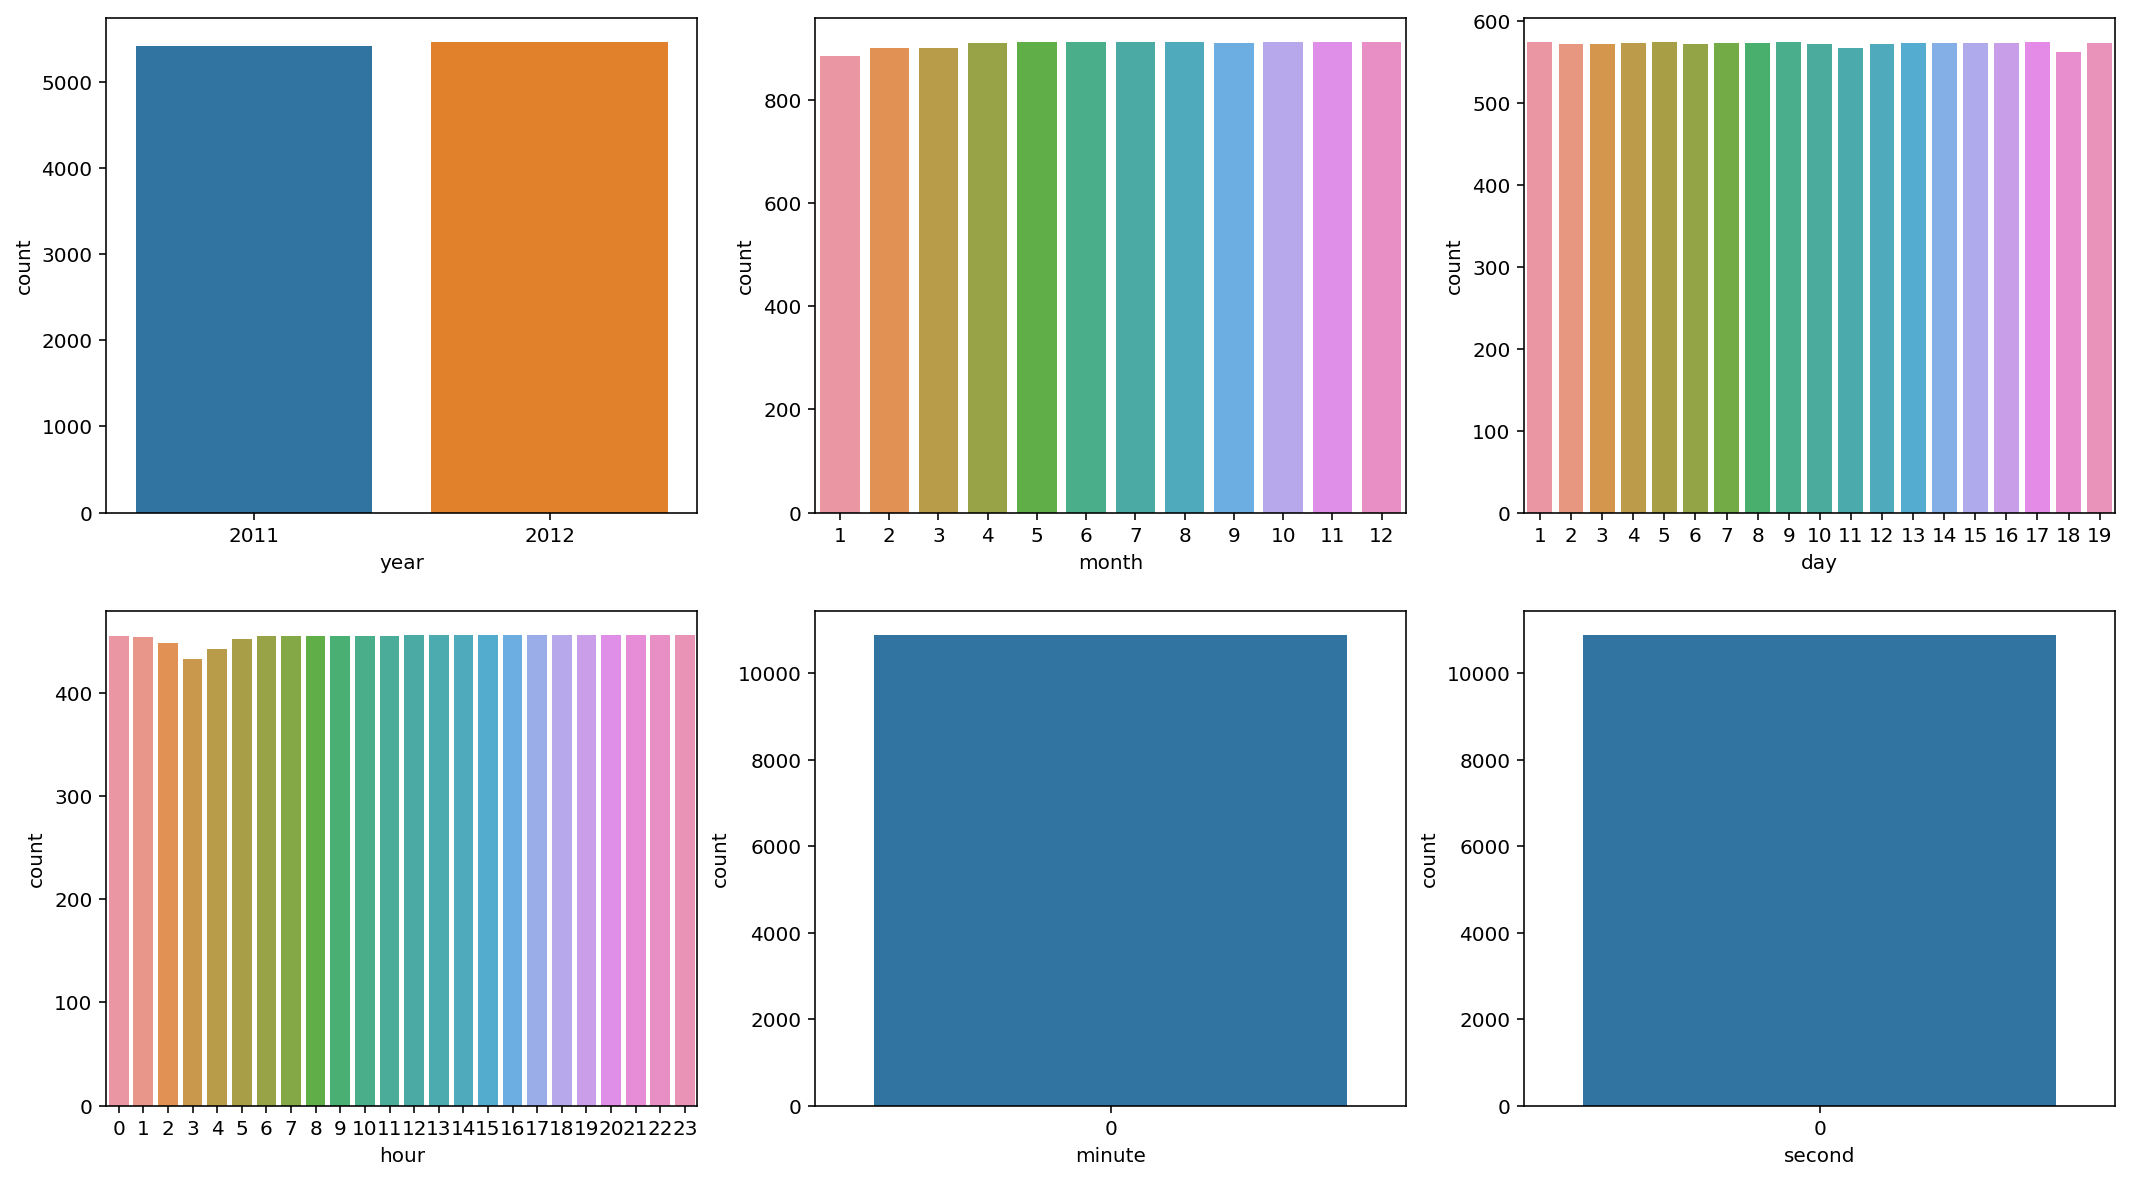

In [246]:
fig, ax = plt.subplots(2,3, figsize=(18, 10))

l = ['year','month','day','hour','minute','second']

for i in range(len(l)):
    sns.countplot(l[i], data = bike, ax = ax[i//3,i%3])
fig.show()

## train/test 분리

In [269]:
X = bike.iloc[:,[1,2,3,4,5,7,8,15]]
print(X)
y = bike['count']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle = True, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


       season  holiday  workingday  weather   temp  humidity  windspeed  hour
0           1        0           0        1   9.84        81     0.0000     0
1           1        0           0        1   9.02        80     0.0000     1
2           1        0           0        1   9.02        80     0.0000     2
3           1        0           0        1   9.84        75     0.0000     3
4           1        0           0        1   9.84        75     0.0000     4
...       ...      ...         ...      ...    ...       ...        ...   ...
10881       4        0           1        1  15.58        50    26.0027    19
10882       4        0           1        1  14.76        57    15.0013    20
10883       4        0           1        1  13.94        61    15.0013    21
10884       4        0           1        1  13.94        61     6.0032    22
10885       4        0           1        1  13.12        66     8.9981    23

[10886 rows x 8 columns]
(8708, 8) (8708,)
(2178, 8) (2178,)


## Linear Model 불러오기, 학습하기

In [270]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## test 데이터에 대한 예측값 출력 및 손실함수값 계산

In [271]:
predictions = model.predict(X_test)
predictions

array([296.49035776,   8.69998114, 234.61589658, ..., 266.60400968,
         6.42320894, 202.79807521])

In [272]:
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(mse)
print(rmse)

21739.63893147142
147.4436805409829


## temp, humidity / count로 예측결과 시각화

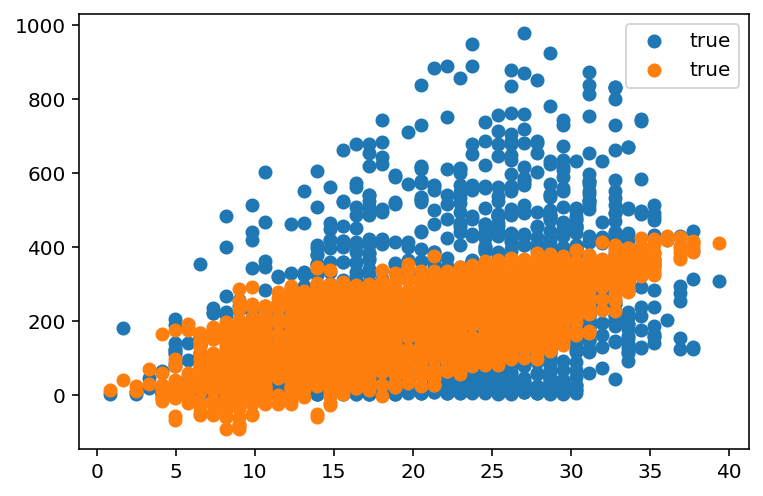

In [252]:
plt.scatter(X_test['temp'], y_test, label = "true")
plt.scatter(X_test['temp'],predictions, label = "true")
plt.legend()
plt.show()

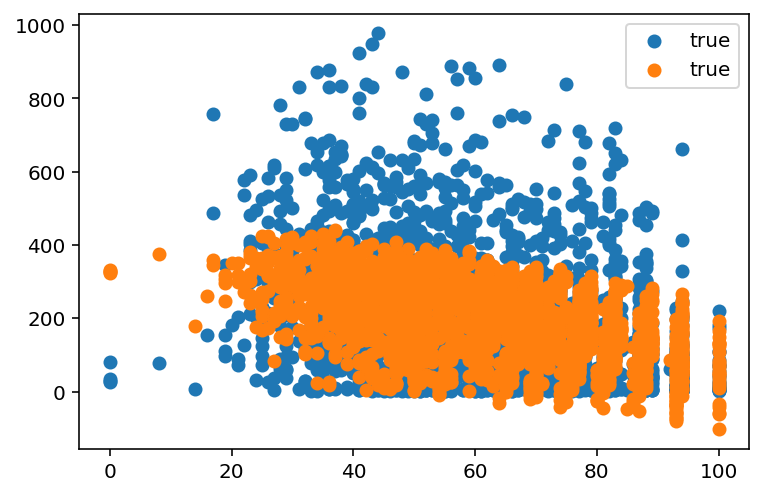

In [274]:
plt.scatter(X_test['humidity'], y_test, label = "true")
plt.scatter(X_test['humidity'],predictions, label = "true")
plt.legend()
plt.show()

## Conclusion

- 변수를 탐색하는 것이 매우 중요할 것 같음. 
- 맨 처음 변수 이해 없이 거의 다 넣었더니 RMSE가 이상하게 거의 0에 수렴함.
- 알고보니 casual+registered=counts 여서, casual과 registered를 제외시킴
- 그리고 holiday는 너무 치중되어 있는 데이터였음. (넣는 것과 빼는 것 별 차이 없어서 그냥 넣어둠)
- temp, humidity 시각화 그래프를 보면 선형 관계가 있는지 잘 모르겠음.